本章首先介绍如何最简单的方法在Excel中至信Python代码， 然后会挑战一下部署xlwings工具。

## 1. 利用xlwings将Excel用作前端
本章节会介绍xlwings的Excel插件一级xlwings的CIL(command line interface命令)。然后会通过quickstart命令创建我们的第一个项目。

最后会展示从Excel中调用Python代码的两种方式， 点击插件中的运行按钮以及VBA中的RunPython函数。

### 1.1 Excel插件

xlwings已经包含在anaconda发行版中。

若想安装这个插件，可以执行以下命令：

`xlwings addin install`

重启excel，就会出现如下图

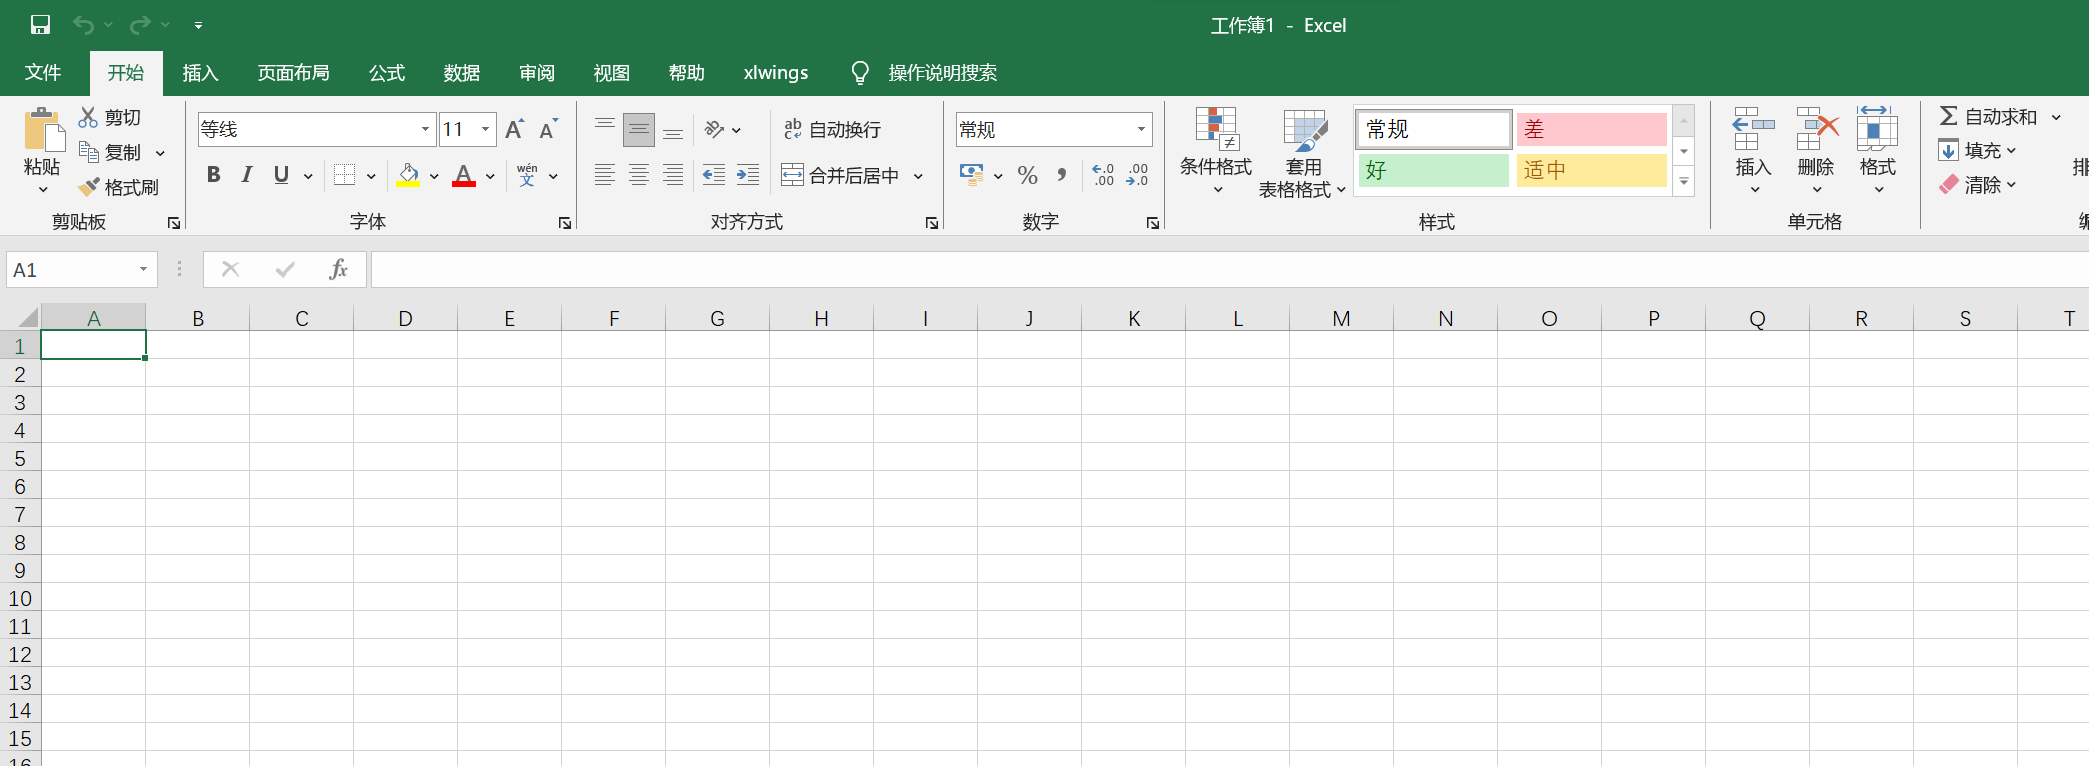

In [4]:
from PIL import Image

img = Image.open('../pic/xlwings_excel.png')
img

### 1.2 quickstart命令

使用cd切换到你想穿件的第一个项目的目录， 然后执行如下命令 创建名为first_project项目

`xlwings quickstart first_project`, 

你会在资源管理器打开文件夹时， 会看到两个文件， first_project.xlsm和first_project.py


在Excel中打开excel文件，在Excel执行python代码最简单的方法是点击插件中Run main按钮

此时，“Hello xlwings！”会在A1单元格中显示。

我们看一下first_projcet.py中的代码

In [8]:
import xlwings as xw


def main():
    # xw.book.caller()是一个xlwings book对象， 它引用的是点击Run main按钮时活动的Excel工作簿。在本例子中对应的是
    # xw.book('first_project.xlsm')
    # xw.book.caller()可以让你对文件系统中的Excel文件进行重命名和移动位置， 且不会破坏文件之间的引用关系。
    wb = xw.Book.caller()  
    sheet = wb.sheets[0]
    if sheet["A1"].value == "Hello xlwings!":
        sheet["A1"].value = "Bye xlwings!"
    else:
        sheet["A1"].value = "Hello xlwings!"


@xw.func #装饰器，表示下列的是函数会调用
def hello(name):
    return f"Hello {name}!"


if __name__ == "__main__":  # python解释器入口
    xw.Book("first_project.xlsm").set_mock_caller()
    main()


### 1.4 RunPython函数
如果想对Python代码有更高的控制权， 可以使用VBA函数RunPython。

RunPython能够接受字符串形式的Python代码：最常见的情况是，你导入一个Python代码模块，然后运行其中的一个函数， 当你按下Alt+F11打开VBA编辑器时，会看见quickstart命令在名为Module1的VBA模块中店家额一个叫SamplleCall的宏。

如下图


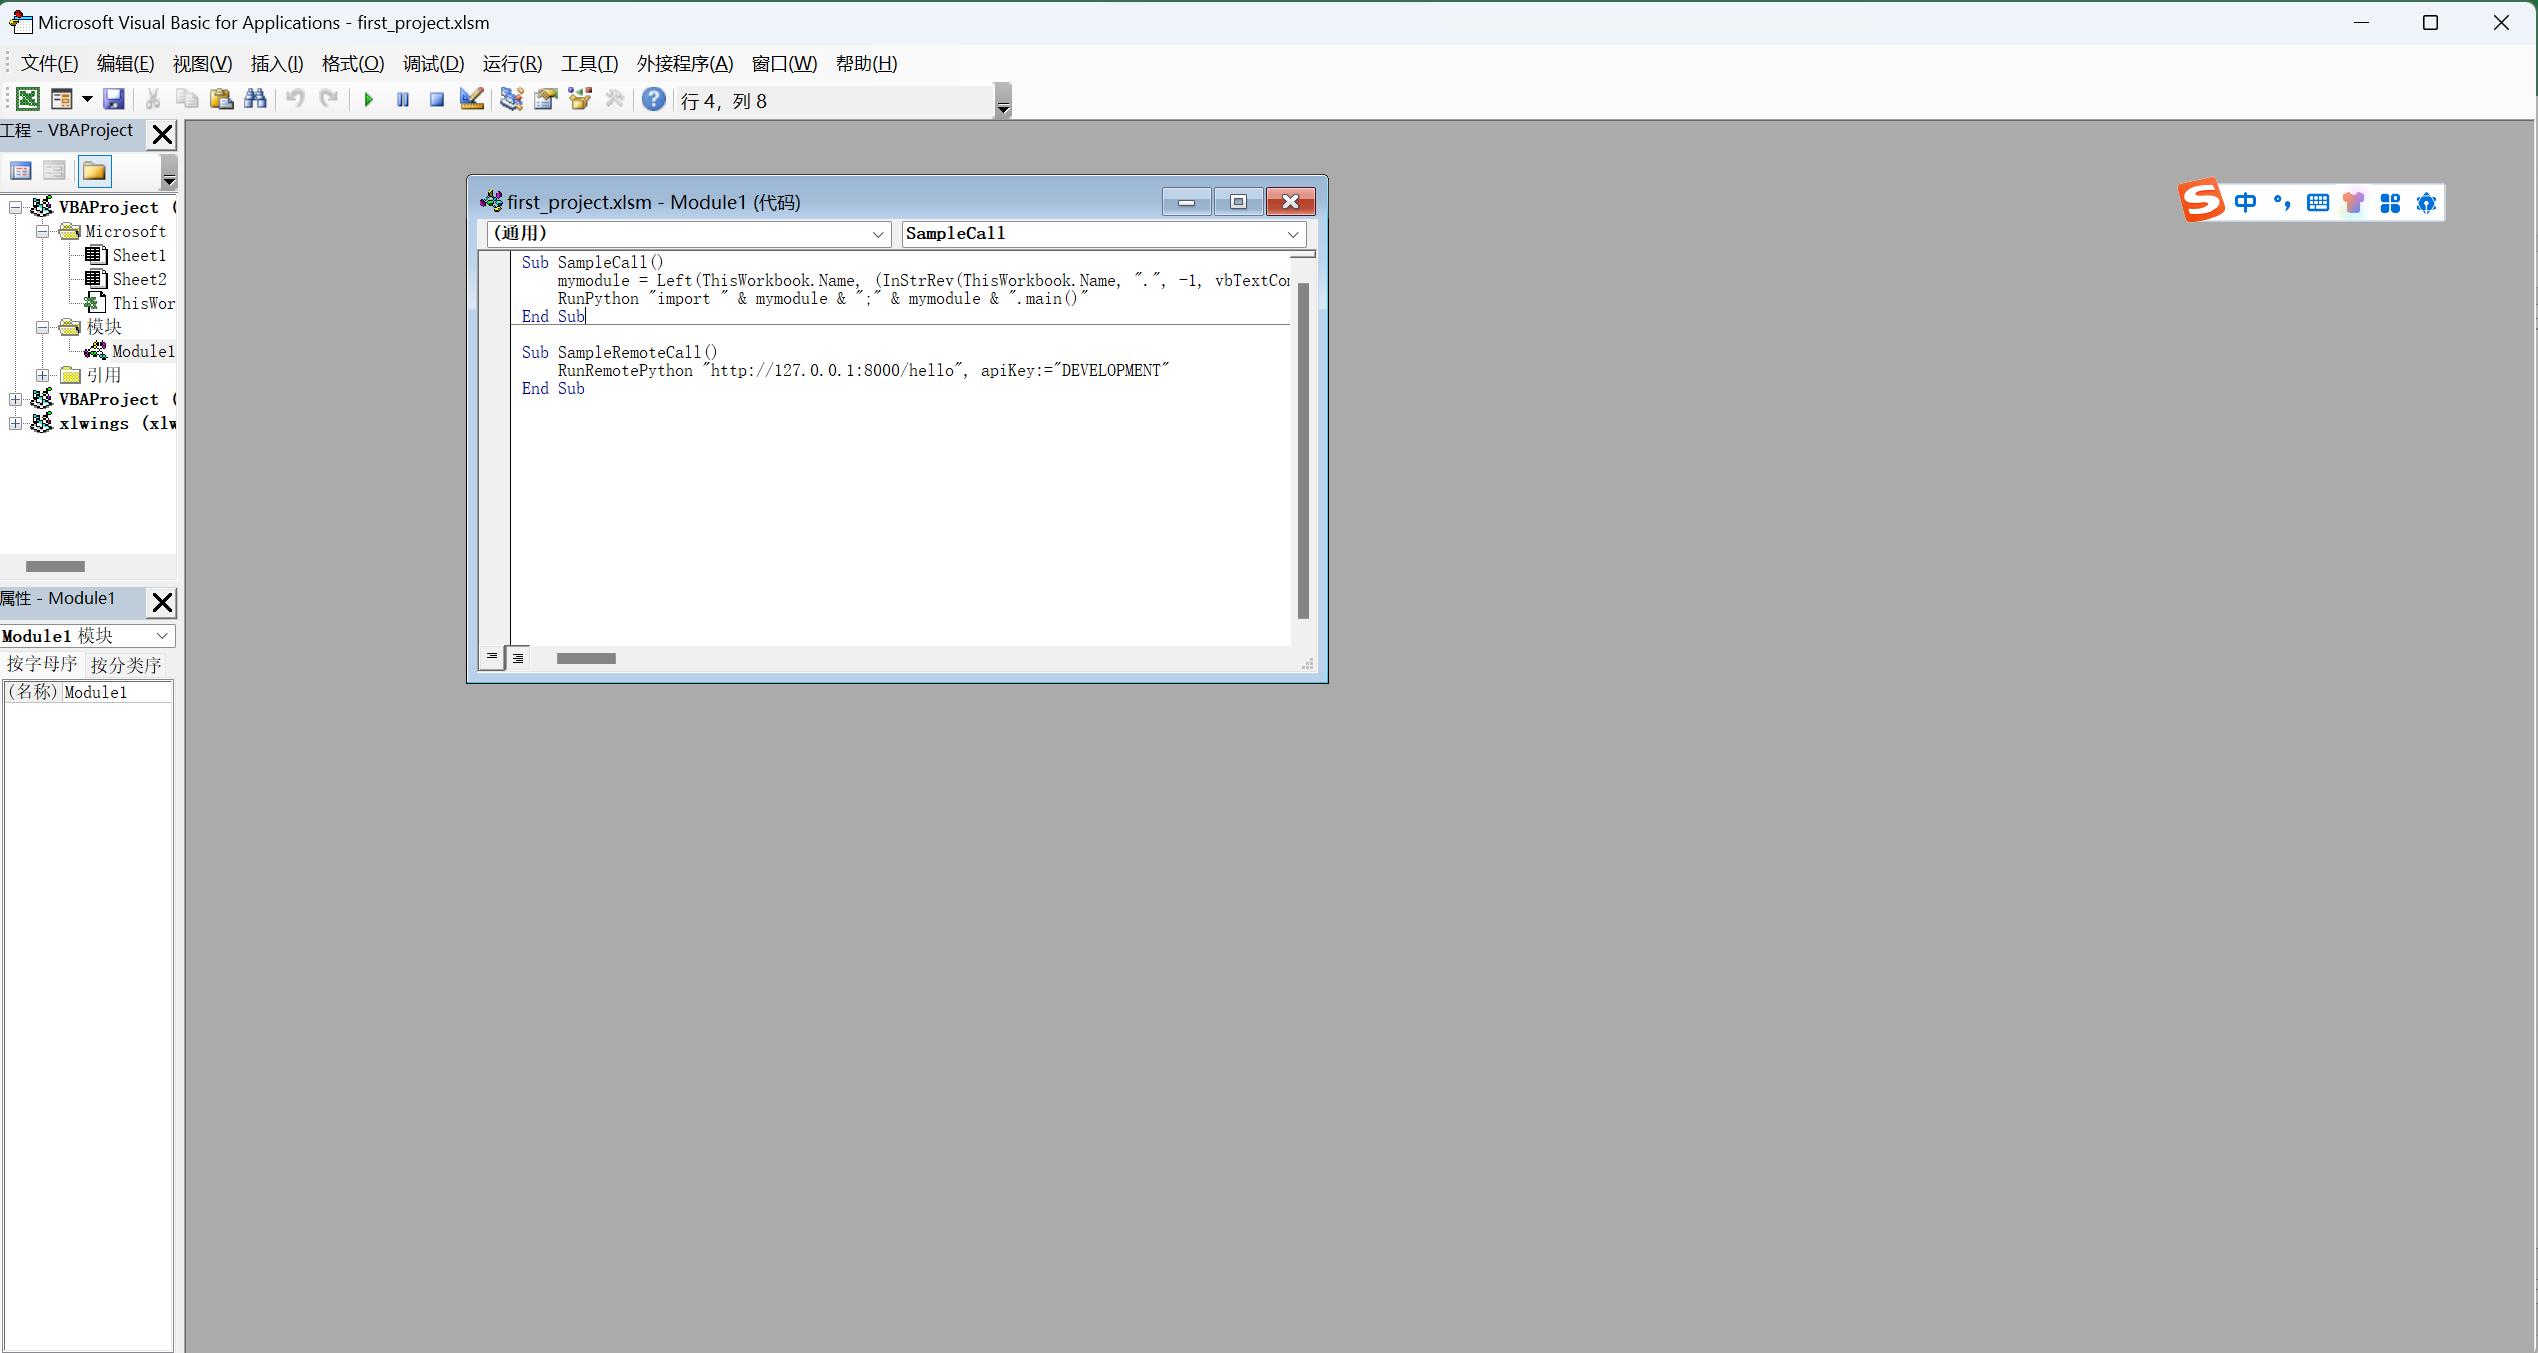

In [2]:
img = Image.open('../pic/xlwings_vba.png')
img

这段代码有点复杂，我们可以换成简单的



```VBA
Sub SampleCall()
    RunPython "import first_project; first_project.main()"
End Sub
```

出现如下图

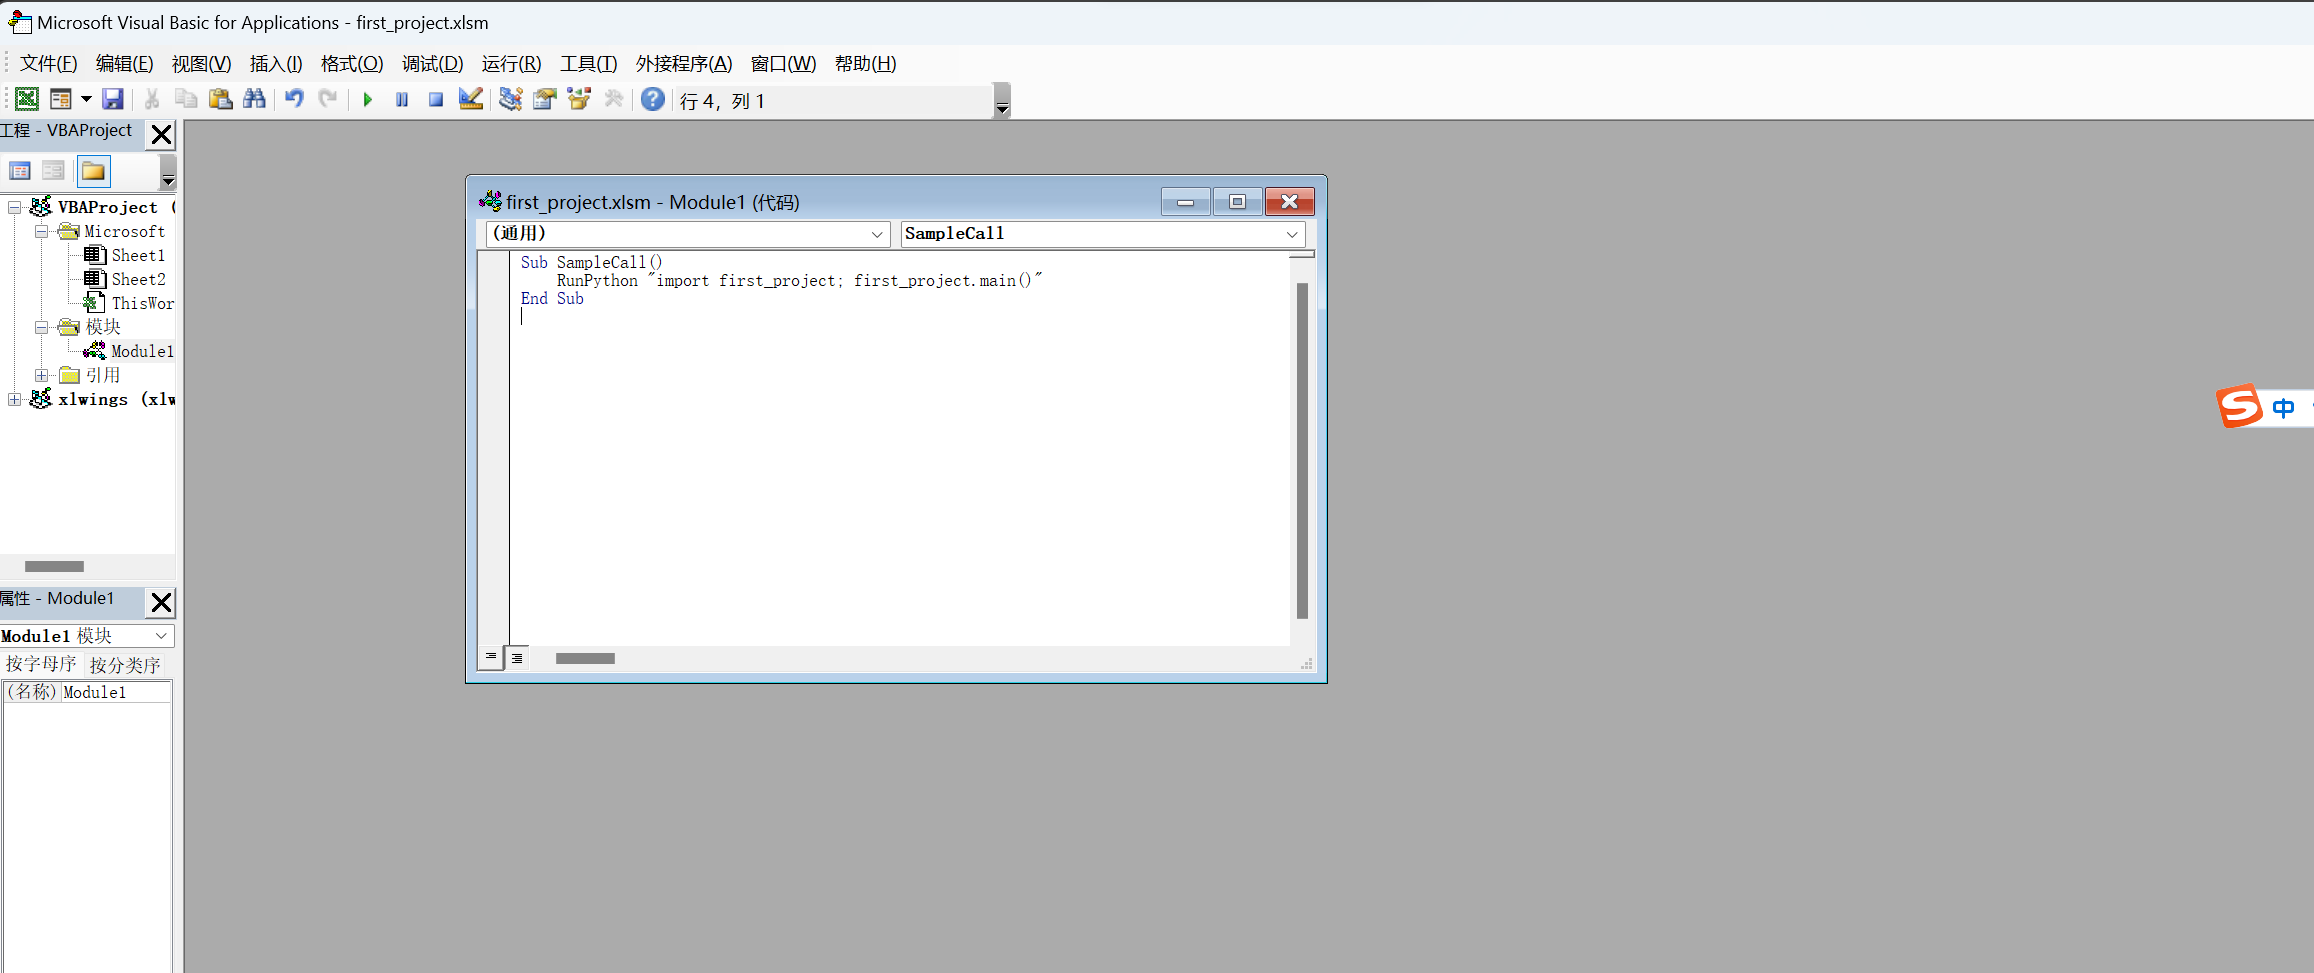

In [9]:
img = Image.open('../pic/Sub_VBA.png')
img # 运行F5 则在A1显示文字

运行方式还有第二种，即关闭了VBA编辑器， 回到工作簿中。按下快捷键Alt+F8可以打开宏菜单： 选择SampleCall然后点击运行按钮。

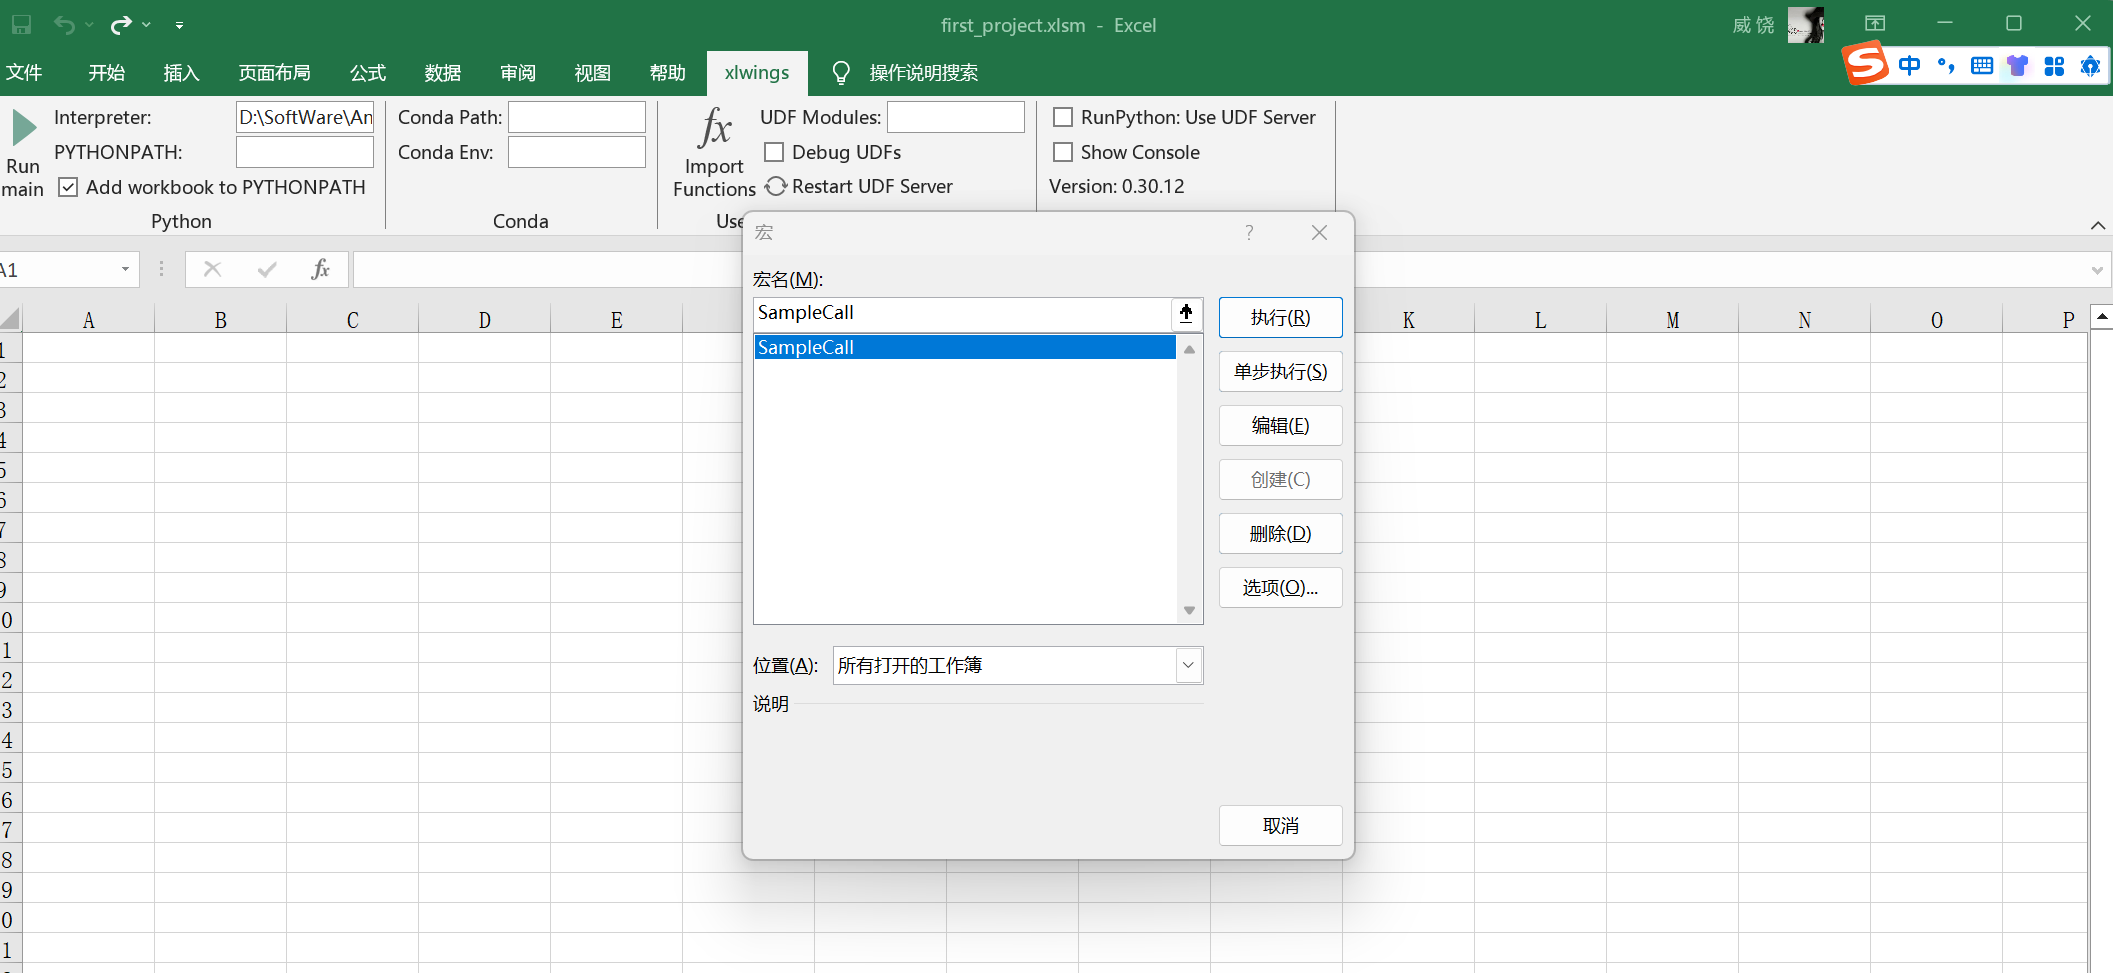

In [10]:
img = Image.open('../pic/Sub_VBA_2.png')
img # 运行F5 则在A1显示文字

假如想更加方便的话，我们可以在Excel中添加一个按钮，将按钮点击触发的功能连接到SampleCall函数，我们前期需要做以下几个工作

1. 文件->更多->选项->自定义功能区->开发工具勾选： 现象--在主界面出现了“开发工具”的栏目
2. 选择按钮工具，此时鼠标指针变成一个小十字：按住数据左键绘制出一个矩形区域以生成按钮。，见下图
3. 一旦放开鼠标左键， 你就会看到一个附加宏菜单，选择SampleCall然后点击OK。


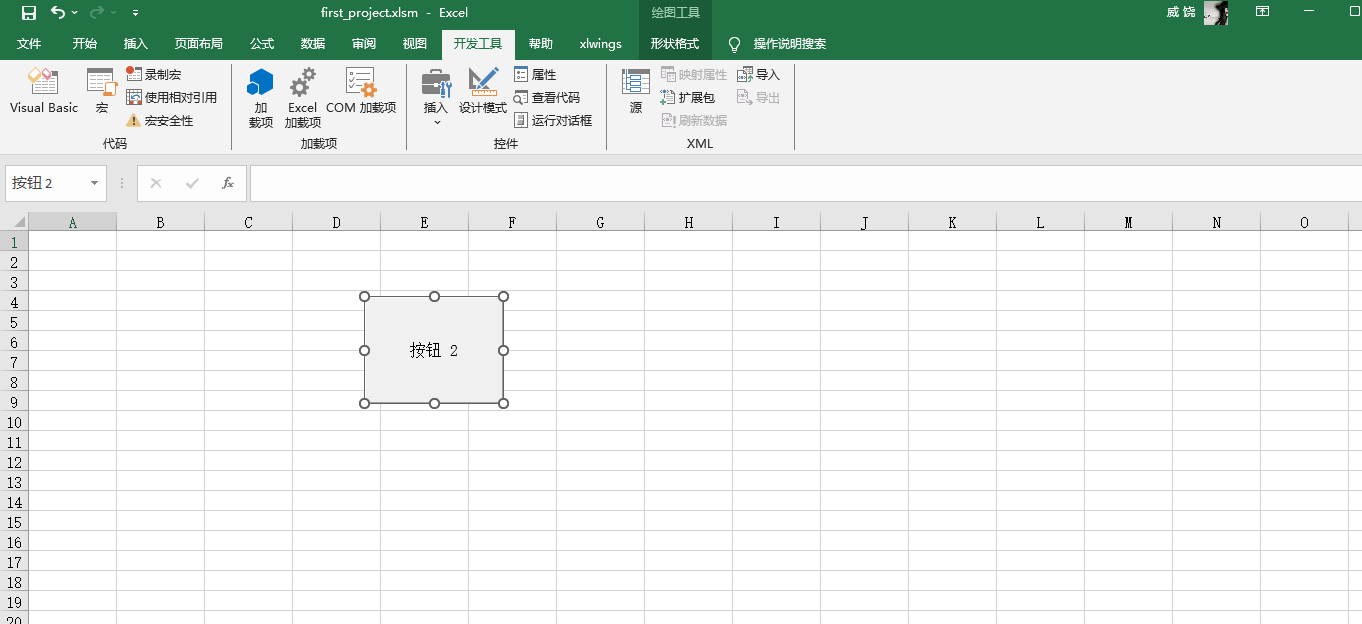

In [11]:
img = Image.open('../pic/Sub_VBA_4.png')
img 

现在我们看下如何修改quickstart命令赋予的默认名称：

1. 返回Python文件并将其名称从first_project.py改成hello.py
2. 将main函数重命名成hello_world.一定要保存文件
3. 然后再次打开VBA编辑器，将代码修改为如下
   ```VBA
    Sub SampleCall()
        RunPython "import hello; hello.hellos_world()"
    End Sub
   ```
4. 发现点击Button一切正常

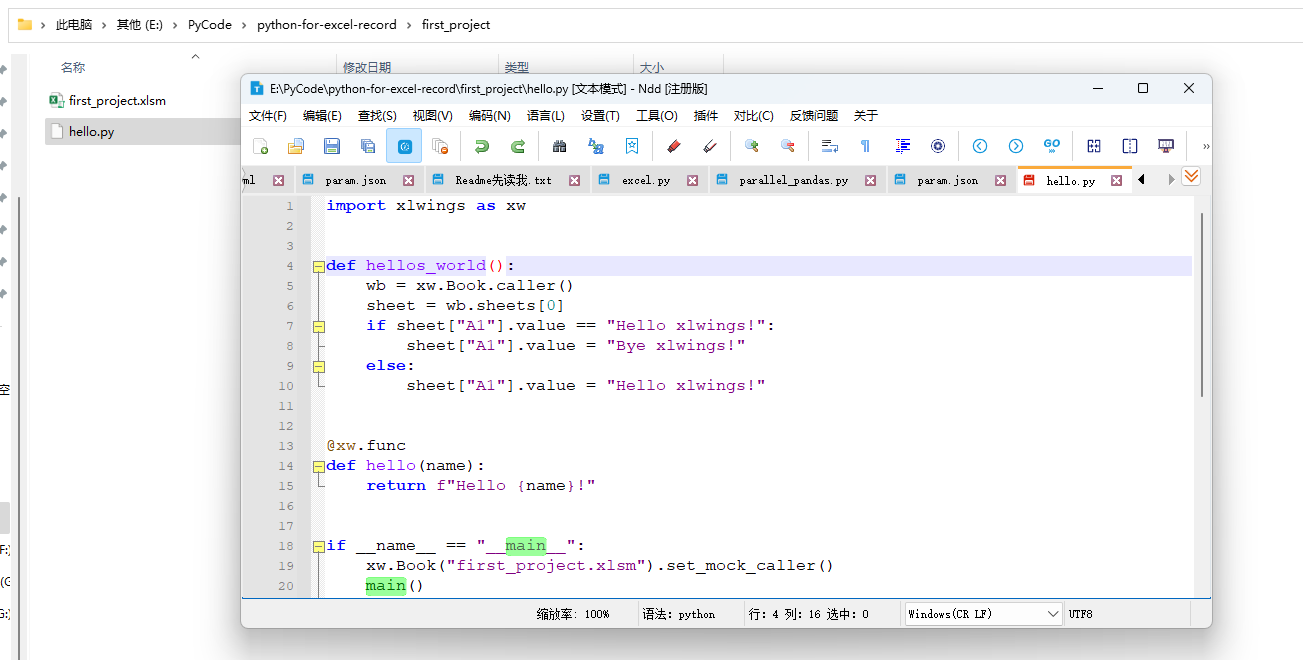

In [12]:
img = Image.open('../pic/Sub_VBA_5.png')
img

极端一些： 我们想在其他同事电脑上的某个excel上用上述类似的功能，但是我们不想使用quickstart命令来执行RunPython函数(宏函数)，类似增加一个按钮就能用该怎么办

1. 确保工作簿以启动宏的格式保存， 扩展名为xlsm或xlsb
2. 添加一个VBA模块， 通过At+F11打开编辑器， 确保在左侧的树状数据选中你的工作簿VBAProject。单击右键， 选择‘Insert > Module’，你开始编写好含有RunPython调用的VBA宏
3. 勾选xlwings的引用： 工具>引用
4. 在VBA编辑器处，我们点击F5，调用VBA宏函数

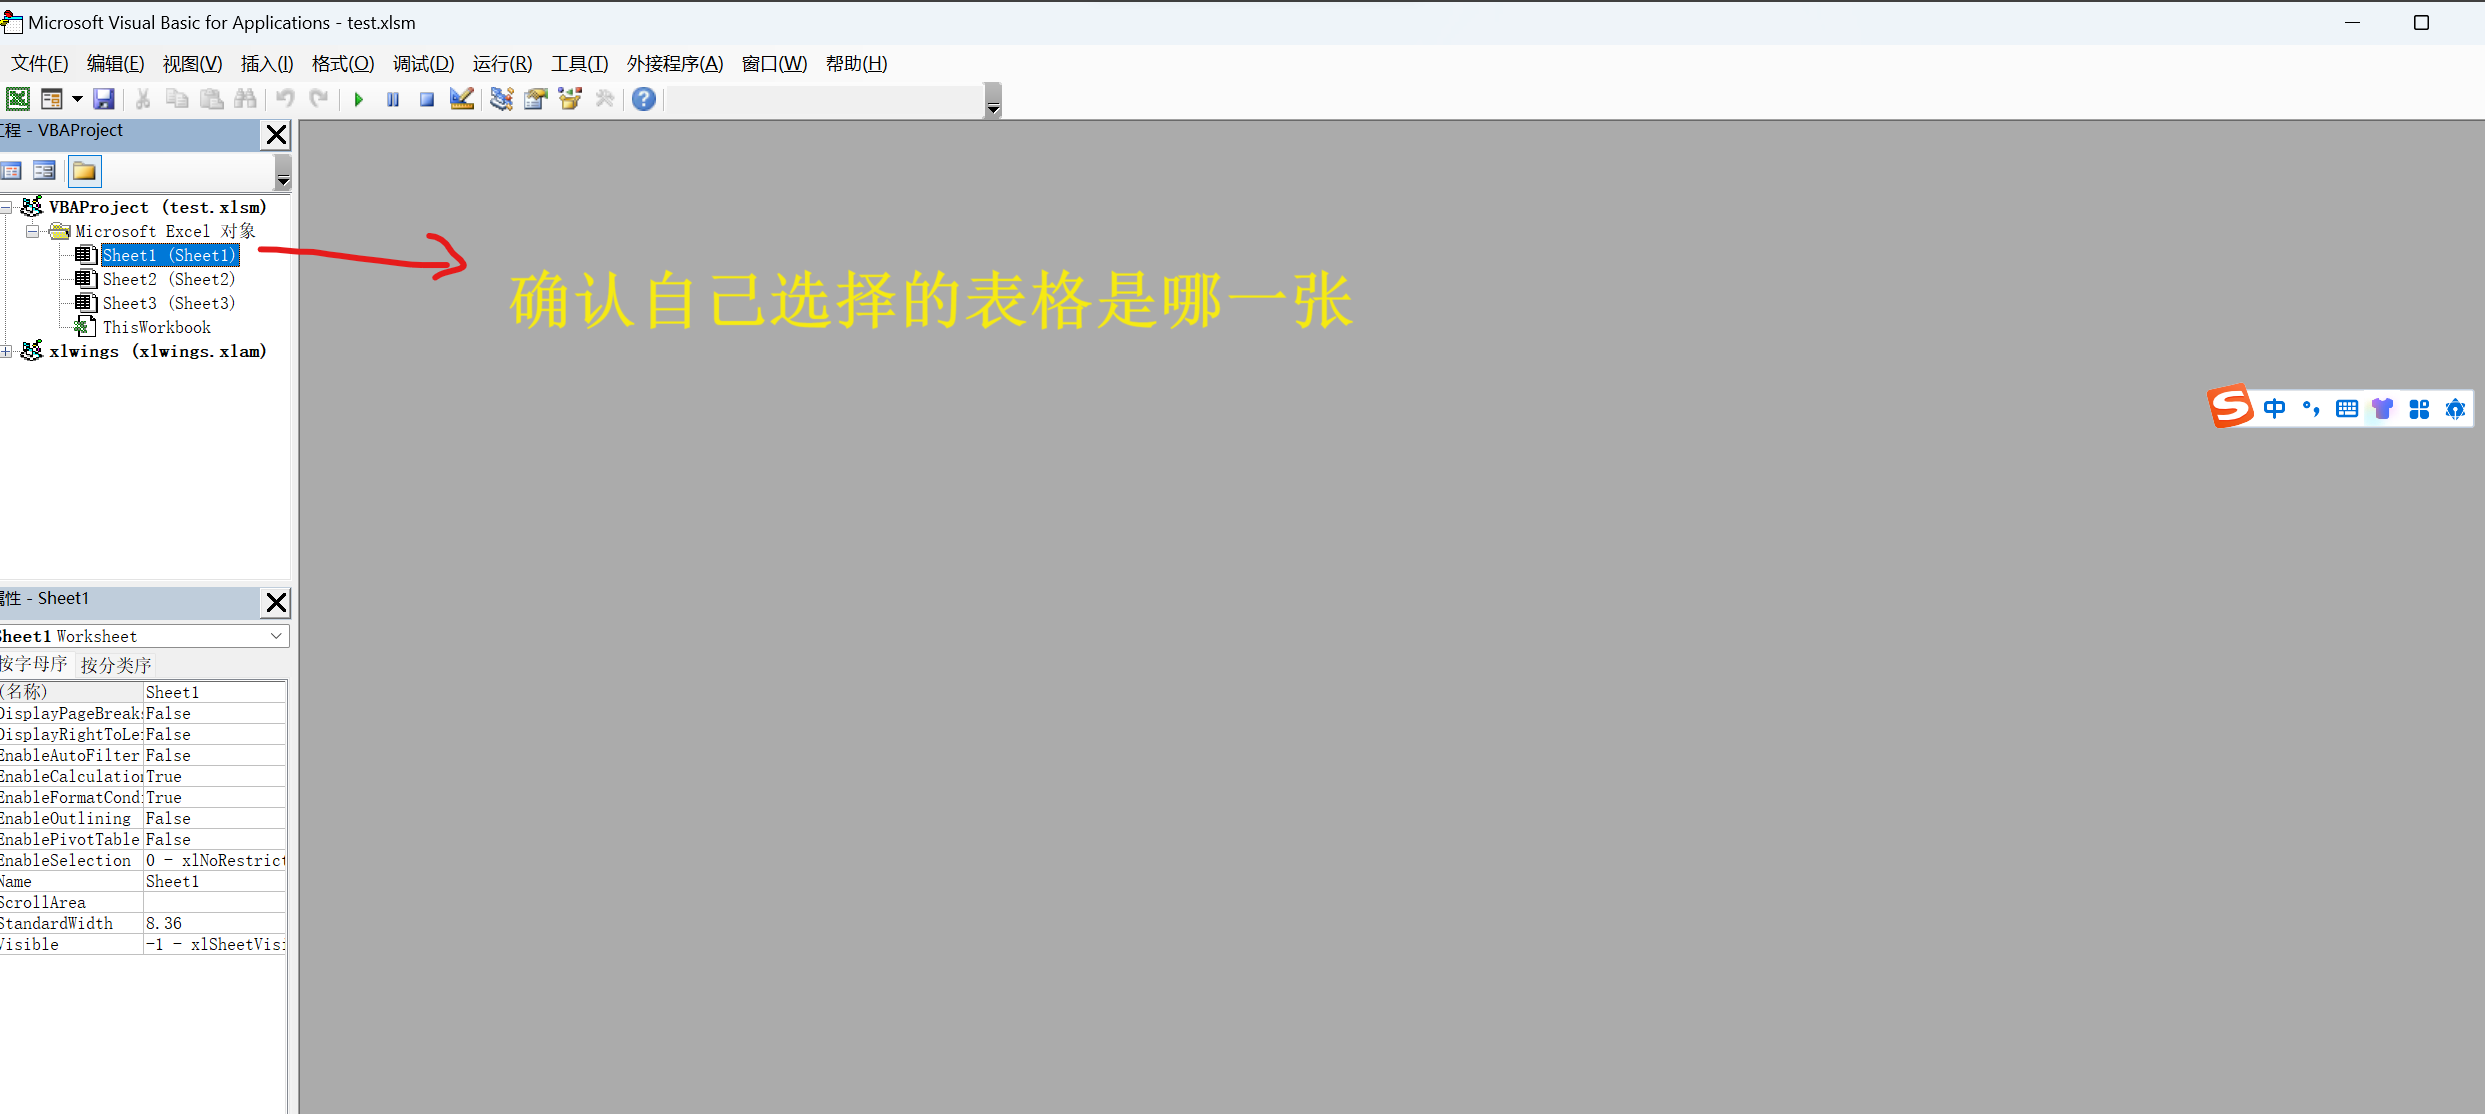

In [14]:
img = Image.open('../pic/Sub_VBA_6.png')
img

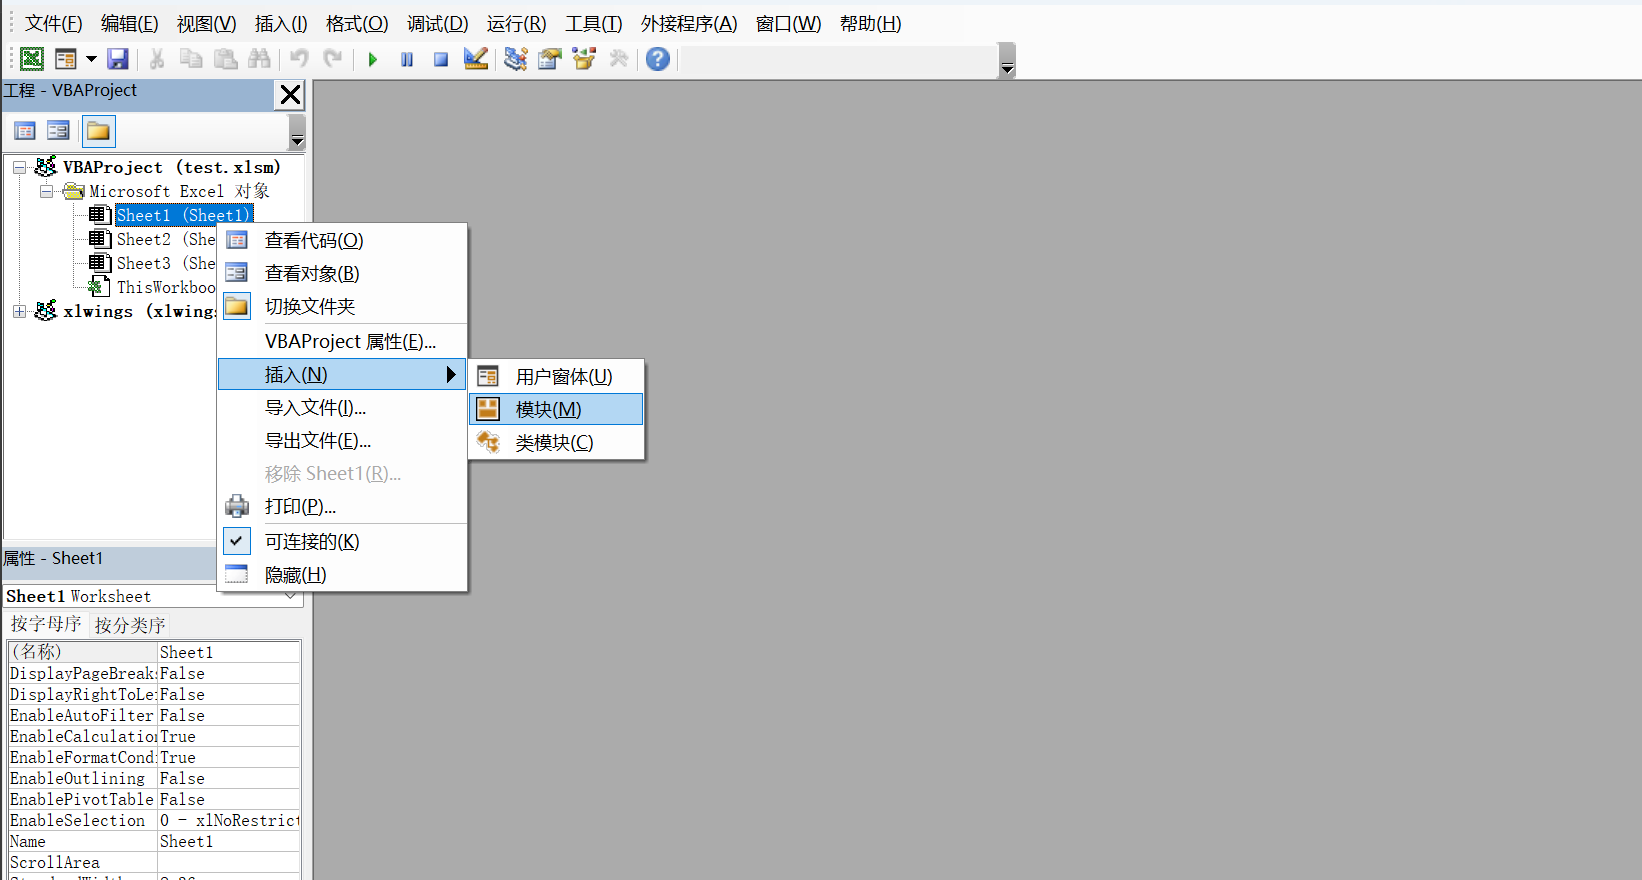

In [15]:
img = Image.open('../pic/Sub_VBA_7.png')
img

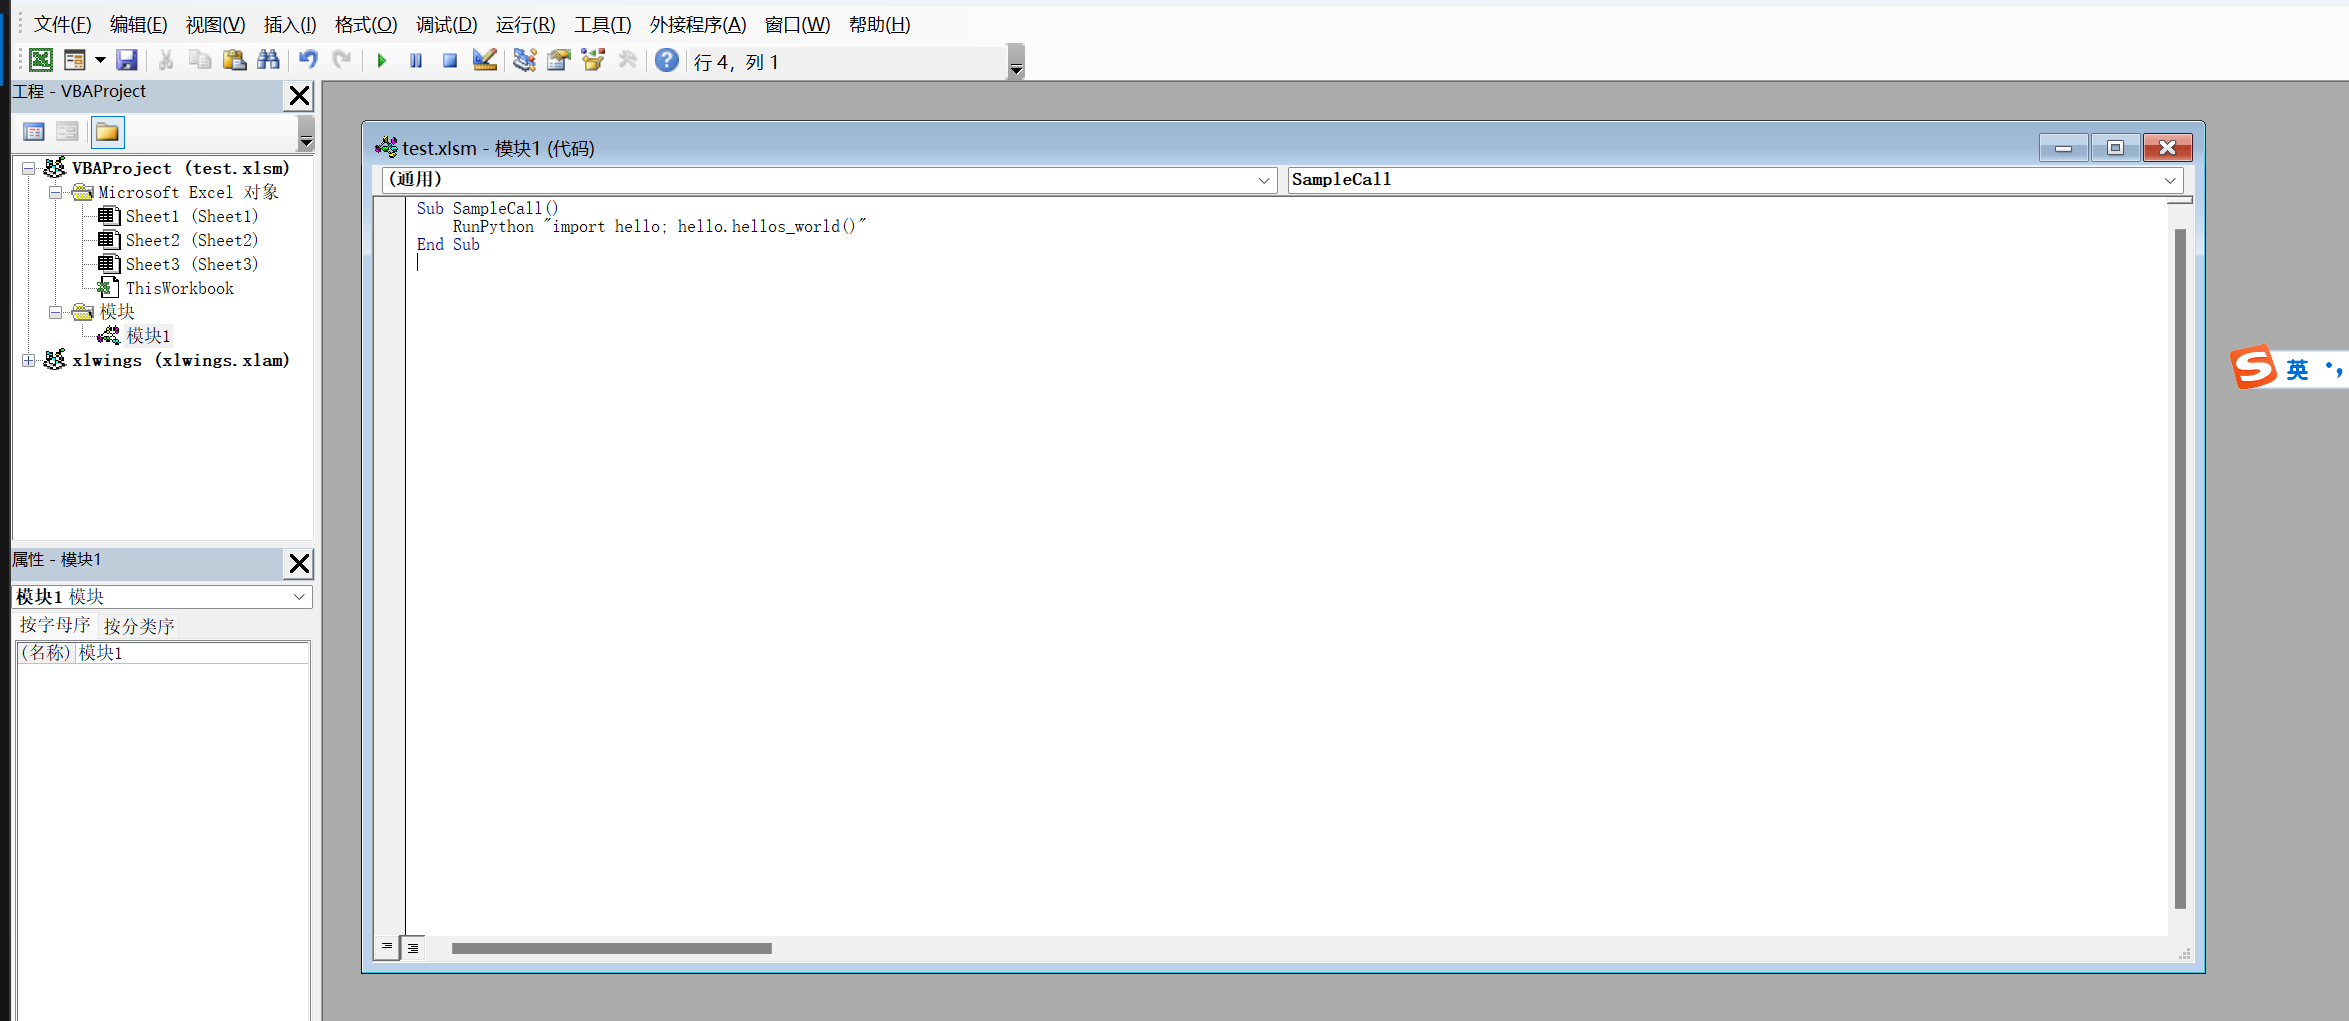

In [16]:
img = Image.open('../pic/Sub_VBA_8.png')
img

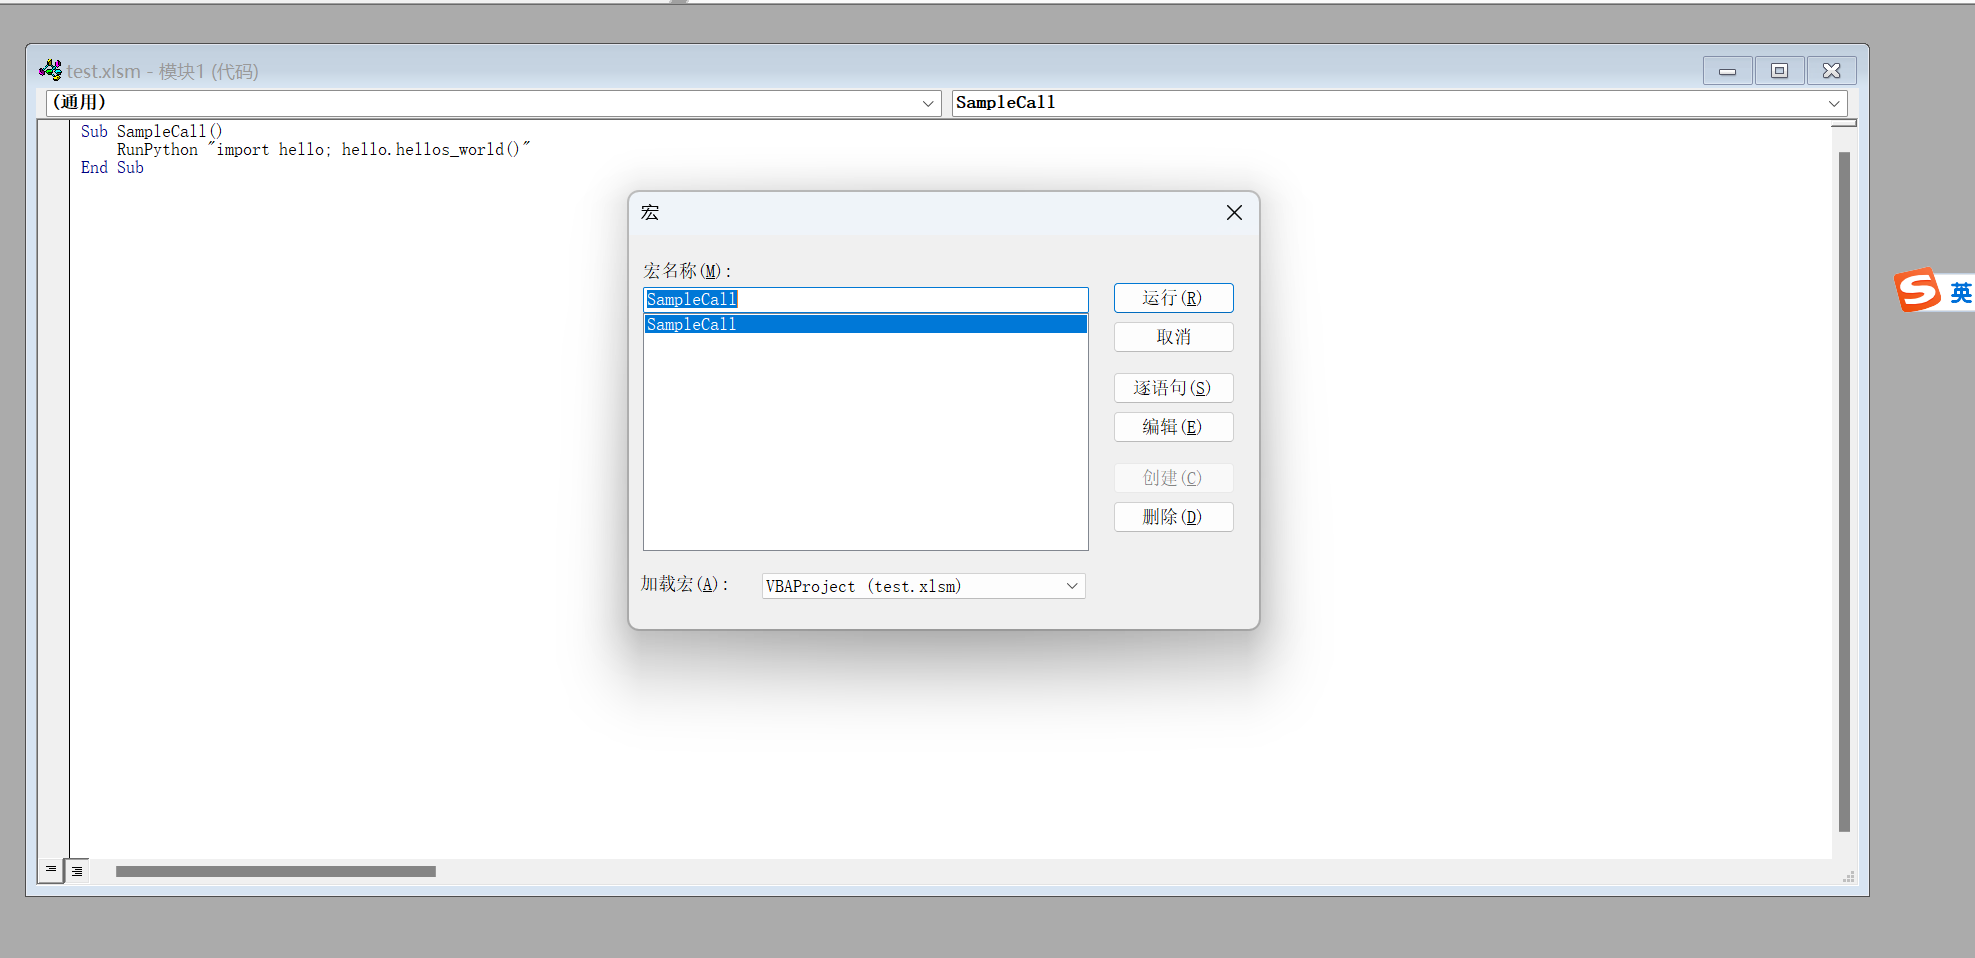

In [17]:
img = Image.open('../pic/Sub_VBA_9.png')
img

上述的过程能过实现在其他用户电脑上也能正常运行。